# Image Classification Using CNN
By : Hesham Asem

________

we'll build a CNN using Keras to use it classifying thousands of pictures in six different categories

Data link : https://www.kaggle.com/puneet6060/intel-image-classification

first to import libraries


In [12]:
! pip install opendatasets




Unable to create process using 'C:\Users\Electronica Care\.conda\envs\tf\python.exe "C:\Users\Electronica Care\.conda\envs\tf\Scripts\pip-script.py" install opendatasets'


In [13]:
! pip install --upgrade kaggle


Unable to create process using 'C:\Users\Electronica Care\.conda\envs\tf\python.exe "C:\Users\Electronica Care\.conda\envs\tf\Scripts\pip-script.py" install --upgrade kaggle'


In [14]:
! pip install --upgrade --force-reinstall --no-deps kaggle

Unable to create process using 'C:\Users\Electronica Care\.conda\envs\tf\python.exe "C:\Users\Electronica Care\.conda\envs\tf\Scripts\pip-script.py" install --upgrade --force-reinstall --no-deps kaggle'


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [21]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/puneet6060/intel-image-classification")

ModuleNotFoundError: No module named 'tqdm'

In [11]:
! pip install tqdm


Unable to create process using 'C:\Users\Electronica Care\.conda\envs\tf\python.exe "C:\Users\Electronica Care\.conda\envs\tf\Scripts\pip-script.py" install tqdm'


now to define the path ( to swtich it between jupyter notebook & kaggle kernel)

In [2]:
### for Kaggle
trainpath = '../input/intel-image-classification/seg_train/'
testpath = '../input/intel-image-classification/seg_test/'
predpath = '../input/intel-image-classification/seg_pred/'

### for Jupyter
# trainpath = ''
# testpath = ''
# predpath = ''

# Open Folders

now let's first check the Train folder to have a look to its content

In [3]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2404 in folder glacier
For training data , found 2274 in folder sea
For training data , found 2382 in folder street
For training data , found 2512 in folder mountain
For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest


ok , how about the test folder

In [4]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 553 in folder glacier
For testing data , found 510 in folder sea
For testing data , found 501 in folder street
For testing data , found 525 in folder mountain
For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest


_____
now for prediction folder

In [5]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


_____

# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [6]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

now how about the images sizes in train folder

In [7]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

______

ok , almost all of them are 150,150,3 , how about test images ? 

In [8]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

almost same ratios , now to prediction images 

In [9]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily 

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [10]:
s = 100

now to read all pictues in six categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function 

In [11]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

great , now how many items in X_train 

In [12]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

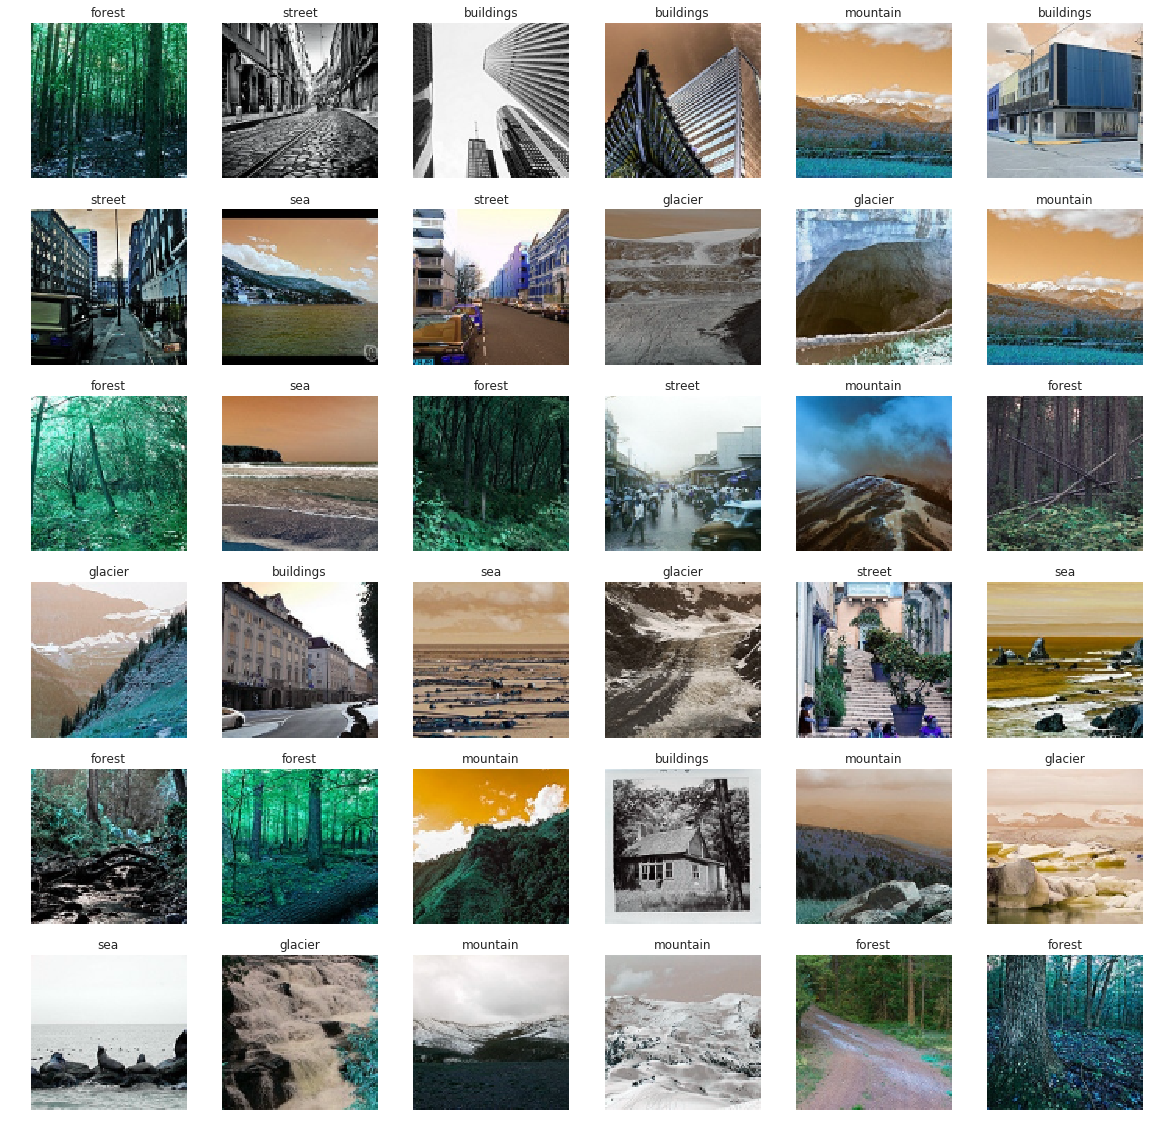

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

great , now to repeat same steps exactly in test data

In [14]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [15]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


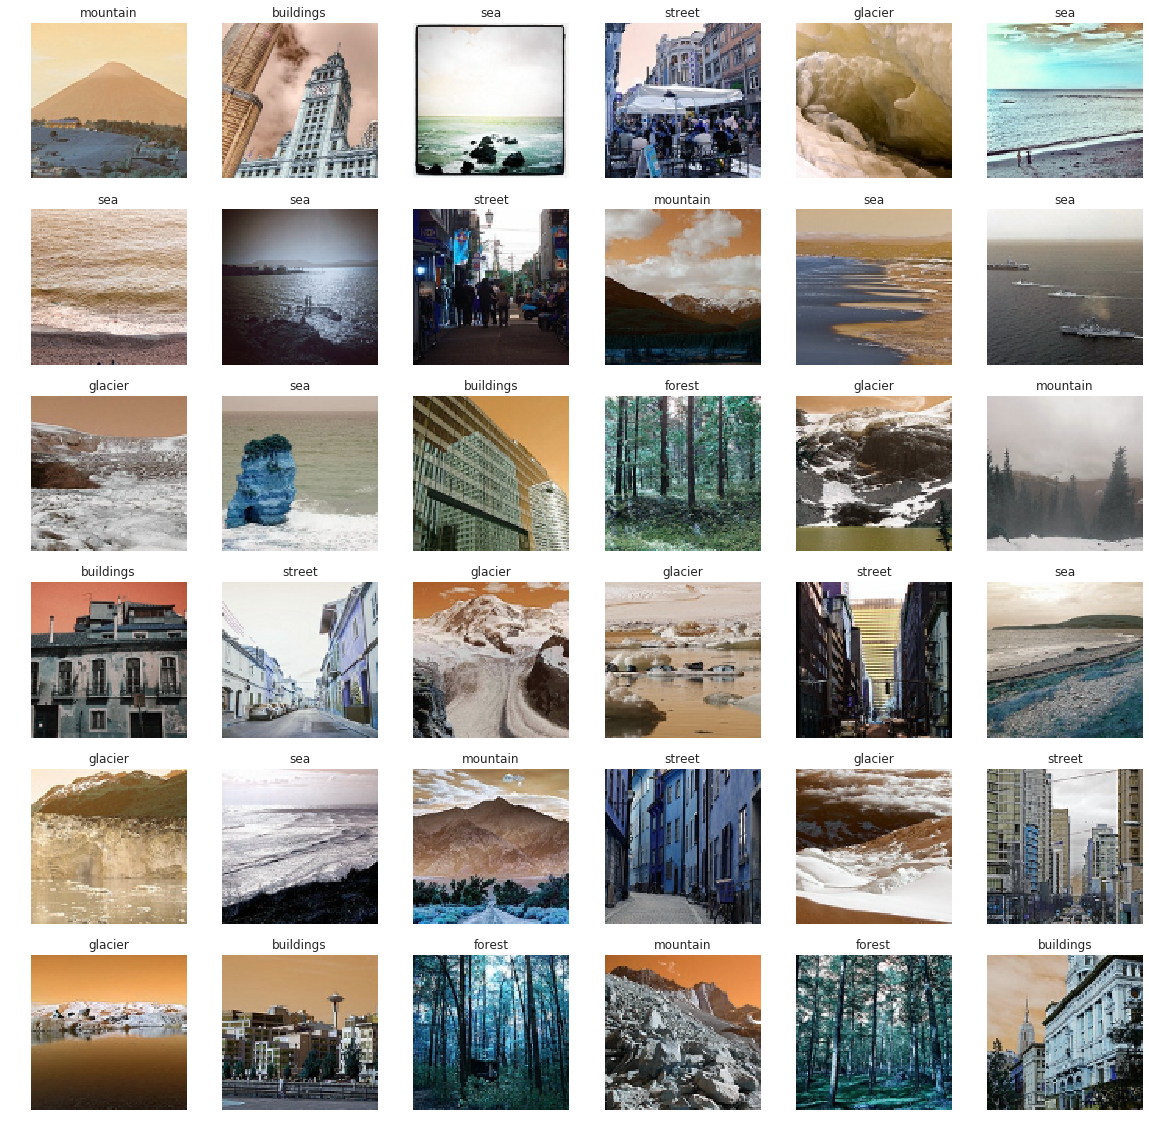

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

also with Prediction data , without having title ofcourse

In [17]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [18]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


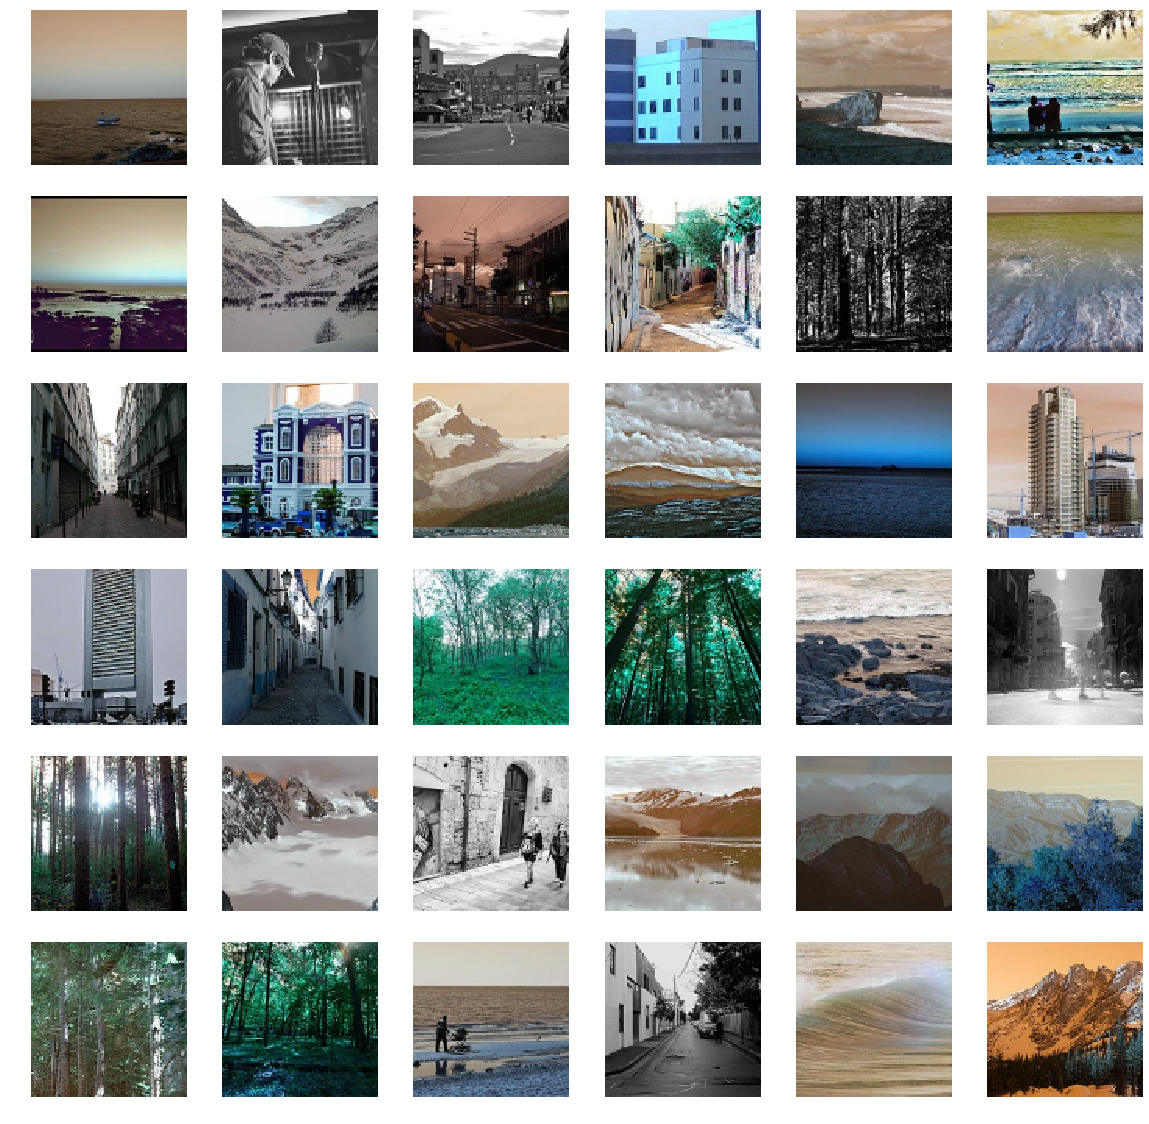

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

________

# Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [21]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [22]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ? 

In [23]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

now to train the model , lets use 50 epochs now

In [24]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
14034/14034 [==============================] - 28s 2ms/step - loss: 1.5908 - accuracy: 0.4010
Epoch 2/50
14034/14034 [==============================] - 25s 2ms/step - loss: 1.0971 - accuracy: 0.5690
Epoch 3/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.9530 - accuracy: 0.6462
Epoch 4/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.8331 - accuracy: 0.7057
Epoch 5/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.7484 - accuracy: 0.7436
Epoch 6/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6924 - accuracy: 0.7674
Epoch 7/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6338 - accuracy: 0.7884
Epoch 8/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6101 - accuracy: 0.7977
Epoch 9/50
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6027 - accuracy: 0.8019
Epoch 10/50
14034/14034 [==============================

how is the final loss & accuracy


In [25]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3000/3000 [==============================] - 2s 761us/step
Test Loss is 1.4351582660730928
Test Accuracy is 0.8203333616256714


ok , only 80% accuracy & can be increased by tuning the hyperparameters



_______

now to predict X test

In [26]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3000, 6)


great

now it's time to redict X Predict

In [27]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (7301, 6)


and to show random redicted pictures & its predicting category


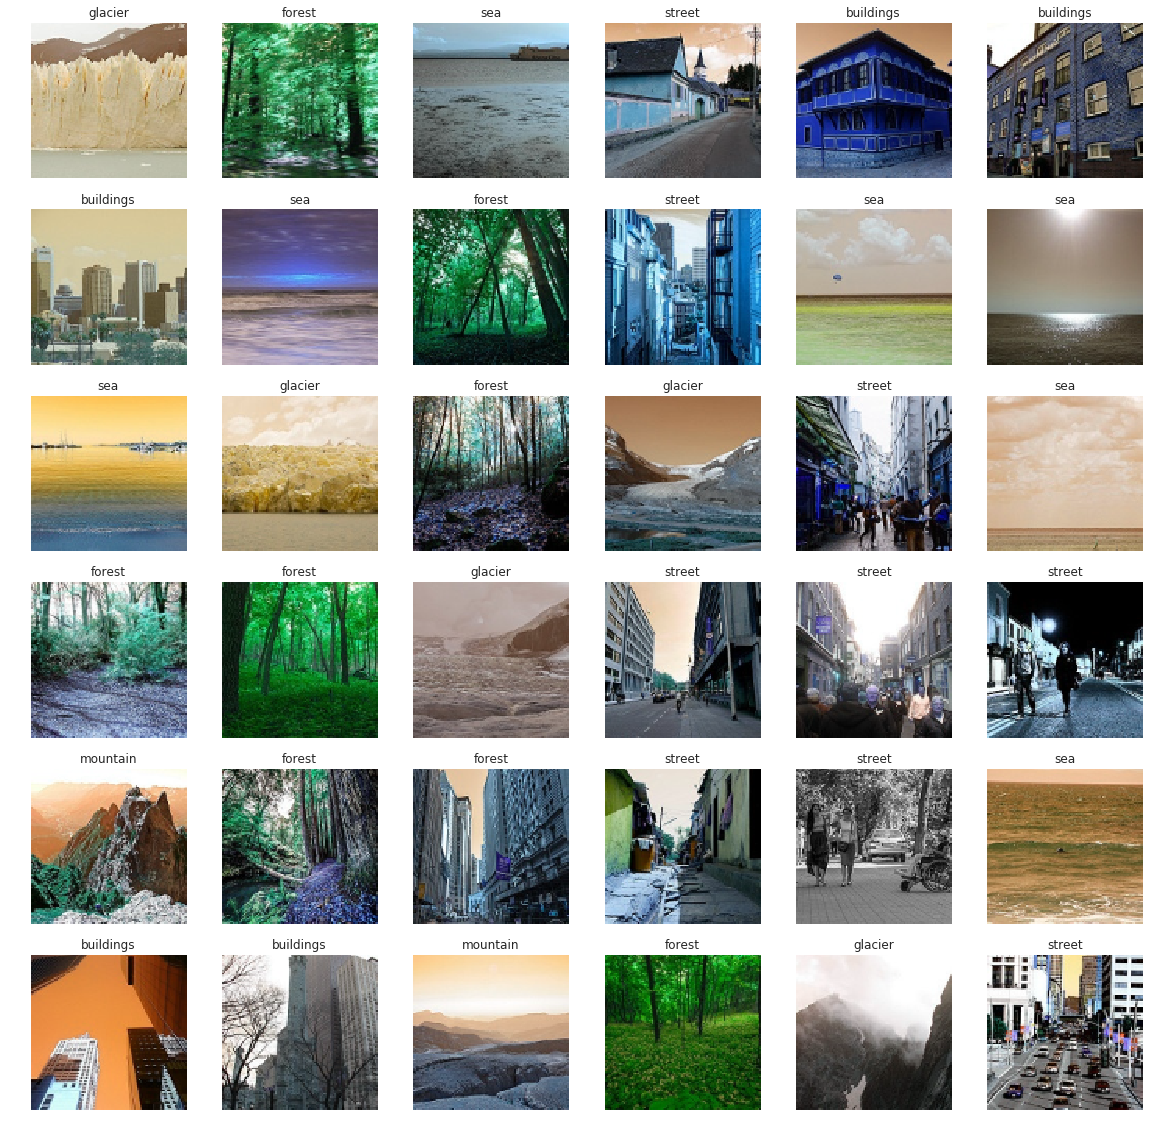

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))